In [600]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Imports for Linear & Logistic regression
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.metrics import mean_squared_error, f1_score

# For Task 5 charts
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cse351-hw3/energy_data.csv
/kaggle/input/cse351-hw3/weather_data.csv


In [601]:
# Load the weather_data.csv into weather_df dataframe
weather_df = pd.read_csv('/kaggle/input/cse351-hw3/weather_data.csv')
# Get a feel for the statistics
weather_df.describe()

,temperature,humidity,visibility,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,7290.000000,8.760000e+03,8760.00000,8760.000000,8760.000000,8760.000000
mean,48.062076,0.682888,9.025791,1016.450749,6.534568,0.137971,1.404301e+09,204.46347,0.003761,37.072056,0.066771
std,19.694743,0.188763,1.859263,7.903670,3.884500,0.212384,9.104179e+06,106.57823,0.015565,20.257221,0.183459
min,-10.070000,0.140000,0.320000,979.980000,0.030000,0.000000,1.388534e+09,0.00000,0.000000,-15.870000,0.000000
25%,33.165000,0.530000,9.040000,1011.530000,3.630000,0.000000,1.396418e+09,150.00000,0.000000,23.425000,0.000000
50%,49.220000,0.710000,9.970000,1016.430000,5.850000,0.060000,1.404301e+09,210.00000,0.000000,38.510000,0.000000
75%,63.832500,0.860000,10.000000,1021.310000,8.692500,0.200000,1.412184e+09,297.00000,0.000000,54.302500,0.000000
max,89.460000,0.960000,10.000000,1042.400000,24.750000,1.000000,1.420067e+09,359.00000,0.355700,72.880000,0.870000


In [602]:
# Load the energy_data.csv into energy_df dataframe
energy_df = pd.read_csv('/kaggle/input/cse351-hw3/energy_data.csv')
# Get a feel for the statistics
energy_df.describe()

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
count,17520.000000,17520.0,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,1.752000e+04,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,0.662905,0.0,0.662905,0.088999,0.085888,0.011036,0.003067,0.015852,0.005105,0.005949,4.602680e-02,0.069099,0.005005,0.053700,0.004186,0.015237,0.073561
std,0.678399,0.0,0.678399,0.438887,0.129054,0.013123,0.020444,0.030792,0.020500,0.003621,7.525857e-02,0.430429,0.007543,0.037668,0.005455,0.066807,0.062182
min,0.011083,0.0,0.011083,0.000000,0.000117,0.000083,0.000000,0.000350,0.000017,0.000050,5.560000e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.314125,0.0,0.314125,0.000030,0.009340,0.005414,0.000099,0.003630,0.002388,0.004841,2.116667e-03,0.000030,0.000298,0.003468,0.001346,0.004153,0.006558
50%,0.468725,0.0,0.468725,0.000069,0.009704,0.005881,0.000219,0.003718,0.003737,0.004928,3.109528e-02,0.000058,0.006979,0.072627,0.003882,0.004624,0.070129
75%,0.700617,0.0,0.700617,0.000707,0.143531,0.007042,0.000333,0.015980,0.003876,0.005001,6.671972e-02,0.000096,0.007175,0.077099,0.004446,0.004877,0.129642
max,6.833205,0.0,6.833205,3.687768,0.437212,0.146692,0.819167,0.423816,0.476571,0.047370,1.514727e+00,4.287879,0.366653,0.211308,0.074872,1.701807,0.410929


**Task 1**

For the first task, I used pd.to_datetime to convert the time fields, where I had to convert to proper format. I then used the date to sum up the energy usage daily, while averaging the weather data. Before averaging the weather data, I dropped the icon and summary columns because I believe they are not necessary. I did consider the fact that they could be used for logistic regression by converting values into discrete numbers, but due to time constraint, I did not consider that possibility. Also, sadly, I did not consider feature scaling despite all these vast values and their differences. Surely, feature scaling would have been a very good option. Once I summed and average the two datasets appropriately to get values for the date, I then merged on the date to get a merged data frame. 

A point of contention is to why average the weather data. Why not use median? Why not use some other mechanism? The main reason I used average is because weather data is mostly natural phenomenon which is generally caputed best by natural distributions and the average alongside standard deviation is the bread and butter for this analysis. This is again, where I regret not using feature scaling or trying it out. It could have improved my score. But, time constraints. 

In [603]:
# Weather time was in unix epoch timestamp format, convert to proper format from unix epoch time
weather_df['date'] = pd.to_datetime(weather_df['time'], unit='s').dt.date
print(weather_df.head()) # Ensure the values work

# Since 'icon', 'time', and 'summary' fields are strings and not used, I dropped them
weather_df = weather_df.drop(columns=['icon', 'summary', 'time'])
print(weather_df.head())

# Average weather column values for each date
weather_df = weather_df.groupby("date").mean().reset_index()
print(weather_df.head())

   temperature                 icon  humidity  visibility        summary  \
0        34.98  partly-cloudy-night      0.64       10.00  Partly Cloudy   
1        16.49          clear-night      0.62       10.00          Clear   
2        14.63          clear-night      0.68       10.00          Clear   
3        13.31          clear-night      0.71       10.00          Clear   
4        13.57          clear-night      0.71        9.93          Clear   

   pressure  windSpeed  cloudCover        time  windBearing  precipIntensity  \
0   1017.69       7.75        0.29  1388534400          279              0.0   
1   1022.76       2.71        0.06  1388538000          195              0.0   
2   1022.32       4.84        0.03  1388541600          222              0.0   
3   1021.64       4.00        0.14  1388545200          209              0.0   
4   1020.73       3.67        0.04  1388548800          217              0.0   

   dewPoint  precipProbability        date  
0     23.89      

In [604]:
# Now I will sum up energy usage for energy_data.csv by day
# First, I extract date 
daily_energy_df = energy_df
daily_energy_df['date'] = pd.to_datetime(energy_df['Date & Time']).dt.date
# print(daily_energy_df.head())

# Second, I now sum up by date
daily_energy_df = daily_energy_df.groupby("date").sum().reset_index()
# print(daily_energy_df.head())

# Third, I drop Date & Time column
daily_energy_df = daily_energy_df.drop(columns=["Date & Time"])
print(daily_energy_df.head())

         date   use [kW]  gen [kW]  Grid [kW]   AC [kW]  Furnace [kW]  \
0  2014-01-01  65.013592       0.0  65.013592  0.042977      8.814319   
1  2014-01-02  32.305336       0.0  32.305336  0.047452     10.830045   
2  2014-01-03  31.164468       0.0  31.164468  0.055865     12.417151   
3  2014-01-04  45.287782       0.0  45.287782  0.048827     11.147332   
4  2014-01-05  36.316643       0.0  36.316643  0.039831      9.301135   

   Cellar Lights [kW]  Washer [kW]  First Floor lights [kW]  \
0            1.137579     0.750298                 0.567603   
1            0.600321     0.323182                 0.506440   
2            0.442453     0.004276                 0.507426   
3            0.674477     1.046294                 0.515988   
4            0.686189     0.235143                 0.519449   

   Utility Rm + Basement Bath [kW]  Garage outlets [kW]  \
0                         0.178529             0.261094   
1                         0.178024             0.282479   
2    

In [605]:
# Now, I will merge the two datasets by date into a 'merged_df'
merged_df = pd.merge(weather_df, daily_energy_df, on='date')
merged_df.head()

,date,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,...,First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01,20.110833,0.556667,9.970000,1025.395000,6.820417,0.031304,252.291667,0.000000,6.362083,...,0.567603,0.178529,0.261094,0.254839,31.938131,0.350291,3.272944,0.200970,4.997037,4.639598
1,2014-01-02,16.382500,0.784583,3.834583,1023.465833,7.433750,0.354444,53.458333,0.002004,10.737083,...,0.506440,0.178024,0.282479,0.798316,5.423866,0.346679,3.475469,0.207041,1.534426,3.881399
2,2014-01-03,6.256667,0.680833,4.509167,1014.428750,12.828333,0.186364,207.333333,0.002029,-2.337500,...,0.507426,0.176649,0.279159,0.746972,0.005554,0.344061,3.615520,0.201975,1.667553,3.671391
3,2014-01-04,2.711667,0.617083,9.822917,1030.096250,5.248333,0.001667,240.166667,0.000000,-8.352083,...,0.515988,0.180056,0.344005,0.640721,19.994908,0.346872,3.700408,0.203913,1.029198,3.357907
4,2014-01-05,17.654167,0.682083,9.134583,1025.275000,3.417083,0.010952,208.958333,0.000033,8.615000,...,0.519449,0.178556,0.348489,0.584570,9.493912,0.346070,3.699178,0.197897,1.619991,4.373730


**Task 2**

I proceeded to create training set and testing set by the months. The training set is the first 11 months, while the testing set is the 12th month aka December. For this, I just created a new column called 'month' which was values 1-12, where I used a conditional to filter where less than 12 is in training, and only 12 is in testing set. I also dropped all the columns from energy data set besides 'use [kW]' as stated in the homework document. 

In [606]:
# For linear regression, I need to test against the days for december. 
# So, I will put months January to November as training, and December for testing. 

# First, add new column labeling each date into correct month
merged_df['month'] = merged_df['date'].apply(lambda x: x.month)

# Create new datatframe task3_df that drops usage by devices
columns_dropped = ["gen [kW]", "Grid [kW]", "AC [kW]", "Furnace [kW]", "Cellar Lights [kW]", "Washer [kW]", "First Floor lights [kW]", "Utility Rm + Basement Bath [kW]", "Garage outlets [kW]", "MBed + KBed outlets [kW]", "Dryer + egauge [kW]", "Panel GFI (central vac) [kW]", "Home Office (R) [kW]", "Dining room (R) [kW]", "Microwave (R) [kW]", "Fridge (R) [kW]"]
task3_df = merged_df.drop(columns=columns_dropped)

# Filter by date into the 2 sets
# Training set is for months 1-11 (jan - nov)

training_set = task3_df[task3_df['month'] < 12].copy()
training_set.tail()

,date,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,use [kW],month
329,2014-11-26,36.385000,0.778333,6.551667,1019.266250,6.445833,0.171333,185.375000,0.024837,29.875417,0.291250,27.712850,11
330,2014-11-27,31.992500,0.847083,7.394583,1012.272917,7.599167,0.420769,316.833333,0.006033,27.862083,0.160417,30.114004,11
331,2014-11-28,29.126250,0.763750,8.919167,1018.359583,6.599167,0.268947,316.416667,0.000271,22.335000,0.006667,26.348404,11
332,2014-11-29,22.344583,0.706667,9.793750,1025.543750,4.299167,0.049167,230.375000,0.000000,13.982083,0.000000,20.241298,11
333,2014-11-30,36.430000,0.730000,9.826250,1021.495000,5.782917,0.202667,185.750000,0.000225,28.567083,0.005833,32.239043,11


In [607]:
# now create testing_set for month == 12( december )
testing_set = task3_df[task3_df['month'] == 12].copy()
testing_set.head()

,date,temperature,humidity,visibility,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,use [kW],month
334,2014-12-01,45.276250,0.722083,9.656667,1018.805417,6.397083,0.263333,226.958333,0.000000,36.748750,0.000000,30.550010,12
335,2014-12-02,34.177917,0.582917,9.839583,1034.805833,7.527083,0.121818,166.625000,0.000000,21.006250,0.000000,31.748857,12
336,2014-12-03,36.345833,0.911250,4.939167,1022.247500,5.691250,0.862000,119.333333,0.010754,33.994167,0.240833,28.773233,12
337,2014-12-04,36.216250,0.584167,9.976667,1024.064583,9.129583,0.130000,286.125000,0.000371,22.777500,0.010000,39.484491,12
338,2014-12-05,27.463750,0.698750,9.847083,1035.654167,3.421667,0.069130,63.833333,0.000000,18.462083,0.000000,33.342503,12


**Task 3 - Linear Regression - Predicting Energy Usage**

Initially, I considered all the columns besides the date, month and I got a RMSE of 8.74. Then, I considered whether I was overfitting due to all the features. After a closer inspection, I figured features like cloud cover could be useless. So, I experimented with dropping different features and found the best score of RMSE to be actually 7.023984 which was after dropping the features: cloud Cover, precipitation intensity, and temperature. Surprisingly, dropping visibility increased the RMSE which makes sense as that means increased usage of light based energy for instance. Also, dropping temperature decreased the RMSE which is interesting but that could be explained by a range of temperatures naturally adjusted by the local population thus the fluctuations are not significant enough for them to consider increasing or decreasing energy usage. 

RMSE: 7.0234

In [608]:
# Linear Regression - Predicting Energy Usage
dropped_columns = ['date', 'use [kW]', 'month', 'cloudCover', 'precipIntensity', 'temperature']

# Training data for x & y (y is target variable - energy usage)
x_train_weather_features = training_set.drop(columns=dropped_columns)
y_train_energy_usage = training_set['use [kW]']

# Testing for x & y (y is target variable - energy usage)
x_test_weather_features = testing_set.drop(columns=dropped_columns)
y_test_energy_usage = testing_set['use [kW]']

In [609]:
# Create, Train, and Test model (also possible consider feature scaling)
linear_model = LinearRegression() # create the model

linear_model.fit(x_train_weather_features, y_train_energy_usage) # train the model
 
energy_usage_predictions = linear_model.predict(x_test_weather_features) # test the model

In [610]:
# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test_energy_usage, energy_usage_predictions, squared=False)
print(f"Linear Regression RMSE: {rmse}")
# RMSE: 8.74057

# dropping dewPoint: 8.5670
# dropping visibility: 9.321976382966911
# dropping precipProbability: 8.77176
# dropping windSpeed: 8.84868
# dropping cloudCover: 7.3877 [-]
# dropping pressure: 8.80587
# dropping temperature: 8.54941 [-]
# dropping precipIntensity: 8.6783 [-]

# dropping cloudCover, precipIntensity: 7.18895
# dropping cloudCover, precipIntensity, temperature: 7.023984

Linear Regression RMSE: 7.023984126286461


In [611]:
# Generating CSV Dump - cse351_hw3_Shuhood_Guhfran_114483164_linear_regression.csv
linear_regression_df = pd.DataFrame({
    'date': testing_set['date'],
    'predicted_value': energy_usage_predictions
})

linear_regression_df.to_csv('/kaggle/working/cse351_hw3_Shuhood_Guhfran_114483164_linear_regression.csv', index=False)
# print(y_test_energy_usage) 

**Task 4 - Logistic Regression: Temperature Classification**

I first created labels where temperature equal to or greater than 35 is 1, and 0 otherwise. Then, I created logistic model and got and F1 score of 0.6485. This felt a bit too low, as I would consider hoping for 0.7 or preferably 0.8+. So, I experimented with dropping different features and found that a bunch were not having any effect such as pressure, whereas dropping visibility significantly boosted the score to 0.766 approximately. 

F1 score: 0.7657

In [612]:
# Logistic Regression - Temperature classification based on weather features
dropped_columns = ['temperature', 'date', 'use [kW]', 'month', 'cloudCover', 'visibility', 'pressure', 'precipProbability']

# Training data for x & y (y is target variable - temperature)
x_train_logistic_weather_features = training_set.drop(columns=dropped_columns)
y_train_temperature = (training_set['temperature'] >= 35).astype(int)

# Testing for x & y
x_test_logistic_weather_features = testing_set.drop(columns=dropped_columns)
y_test_temperature = (testing_set['temperature'] >= 35).astype(int)

In [613]:
# Create, Train, and Test model (also possible consider feature scaling)
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train_logistic_weather_features, y_train_temperature)
temperature_predictions = logistic_model.predict(x_test_logistic_weather_features)

In [614]:
# Calculate F1 score
f1_score = f1_score(y_test_temperature, temperature_predictions)
print(f"Logistic Regression F1_score: {f1_score}")
# f1_score = 0.64865

# drop visibility: 0.7657 [-]
# drop humidity: 0.6667 ---> Combined with others: drops F1 score
# drop pressure: 0.64865 [-] Not needed, same f1_score without it
# drop windSpeed: same --> Combined with others: drops F1 score so do not drop
# drop cloudCover: same [-] Not needed
# drop windBearing: 0.764705 --> Combined with others: drops F1 score so do not drop
# drop precipIntensity: 0.6667
# drop dewPoint: 0.5909 
# drop precipProbability: 0.6667 [-]

# drop visibility, pressure, cloudCover, and precipProbability: 0.764705

Logistic Regression F1_score: 0.7647058823529412


In [615]:
# Generating CSV Dump - cse351_hw3_Shuhood_Guhfran_114483164_logistic_regression.csv
logistic_regression_df = pd.DataFrame({
    'date': testing_set['date'],
    'classification': temperature_predictions
})

logistic_regression_df.to_csv('/kaggle/working/cse351_hw3_Shuhood_Guhfran_114483164_logistic_regression.csv')

In [616]:
# I only need energy_df with 2 devices of interest - AC and Washer
columns_dropped = ["gen [kW]", "use [kW]", "Grid [kW]", "Furnace [kW]", "Cellar Lights [kW]", "First Floor lights [kW]", "Utility Rm + Basement Bath [kW]", "Garage outlets [kW]", "MBed + KBed outlets [kW]", "Dryer + egauge [kW]", "Panel GFI (central vac) [kW]", "Home Office (R) [kW]", "Dining room (R) [kW]", "Microwave (R) [kW]", "Fridge (R) [kW]"]
task5_df = energy_df.drop(columns=columns_dropped)

# Parse using Date & Time column for a new column 'type' which specifies if it is day or night
# day is 6 am - 7 pm (19), night is otherwise
task5_df['hour'] = pd.to_datetime(task5_df['Date & Time']).dt.hour # Get hour 

# Categorize the record as part of day or night
task5_df['type'] = np.where((task5_df['hour'] >= 6) & (task5_df['hour'] < 19), 'day', 'night')

# Sum up for each date, by day and by night
task5_df = task5_df.groupby(['date', 'type'])[['AC [kW]', 'Washer [kW]']].sum().reset_index()

print(task5_df.head()) # prints 2 records for each date (day and night)
print(task5_df.describe())

         date   type   AC [kW]  Washer [kW]
0  2014-01-01    day  0.019924     0.748558
1  2014-01-01  night  0.023052     0.001739
2  2014-01-02    day  0.022543     0.319987
3  2014-01-02  night  0.024908     0.003195
4  2014-01-03    day  0.021077     0.002116
          AC [kW]  Washer [kW]
count  730.000000   730.000000
mean     2.135970     0.073611
std      6.545240     0.185539
min      0.000134     0.000703
25%      0.002571     0.002727
50%      0.010613     0.006773
75%      0.021337     0.010385
max     60.629514     1.224053


**Task 5 - Energy Usage Data Analytics**

I decided to analyze energy usage for AC and Washer. First, I determine which times of the day and what part of the year each device is used most frequently. As can be seen from the plots below, AC is mostly used in summer seasons from around June till October, with majority usage initially in the night but small bursts during the day around July and September. As for the washer, it is used consistently throughout the year and predominantly in the day time. 

Then, the following graph is depicting total energy usage for both AC and Washer by day and night. This is important because it shows which of these devices take up the most energy and whether it is during the day or night time. It may be important for a city or state to consider this data especially in a developing country where energy is an extremely limited resource. For example, Pakistan has a history of having energy shutdowns during times of day due to limited energy resource. Locals would have to rely on generators and uninterrupted power supply (ups) to make do with bare minimum such as chargers and light for instance. By having this data, a country or city or state could plan shutdowns or consider optimizing appropriately without hurting the locals too much. From the data we learn that AC is extremely exhaustive resource and it is especially used in the night time. So, authorities may need to consider this in mind when scheduling energy shutdowns. 

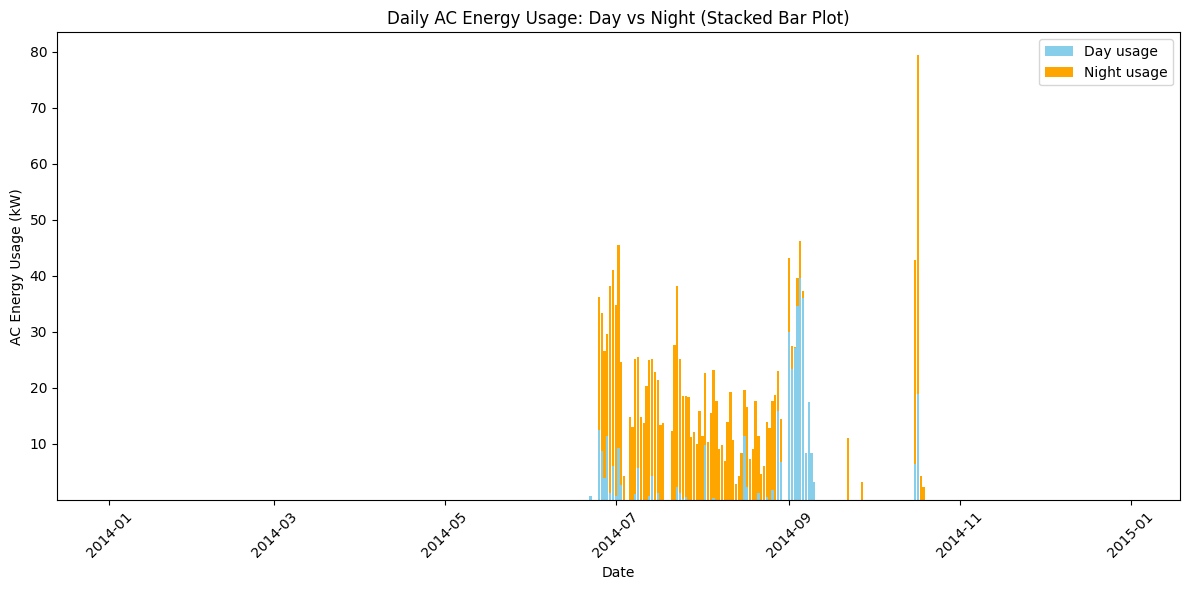

In [617]:
# Stacked bar plot (shows energy usage for each day)

# Pivot to get day and night as columns
pivot = task5_df.pivot(index='date', columns='type', values='AC [kW]')

# Plot stacked bar plot
plt.figure(figsize=(12,6))
plt.bar(pivot.index, pivot['day'], label='Day usage', color='skyblue')
plt.bar(pivot.index, pivot['night'], bottom=pivot['day'], label='Night usage', color='orange')

plt.xlabel('Date')
plt.ylabel('AC Energy Usage (kW)')
plt.title('Daily AC Energy Usage: Day vs Night (Stacked Bar Plot)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

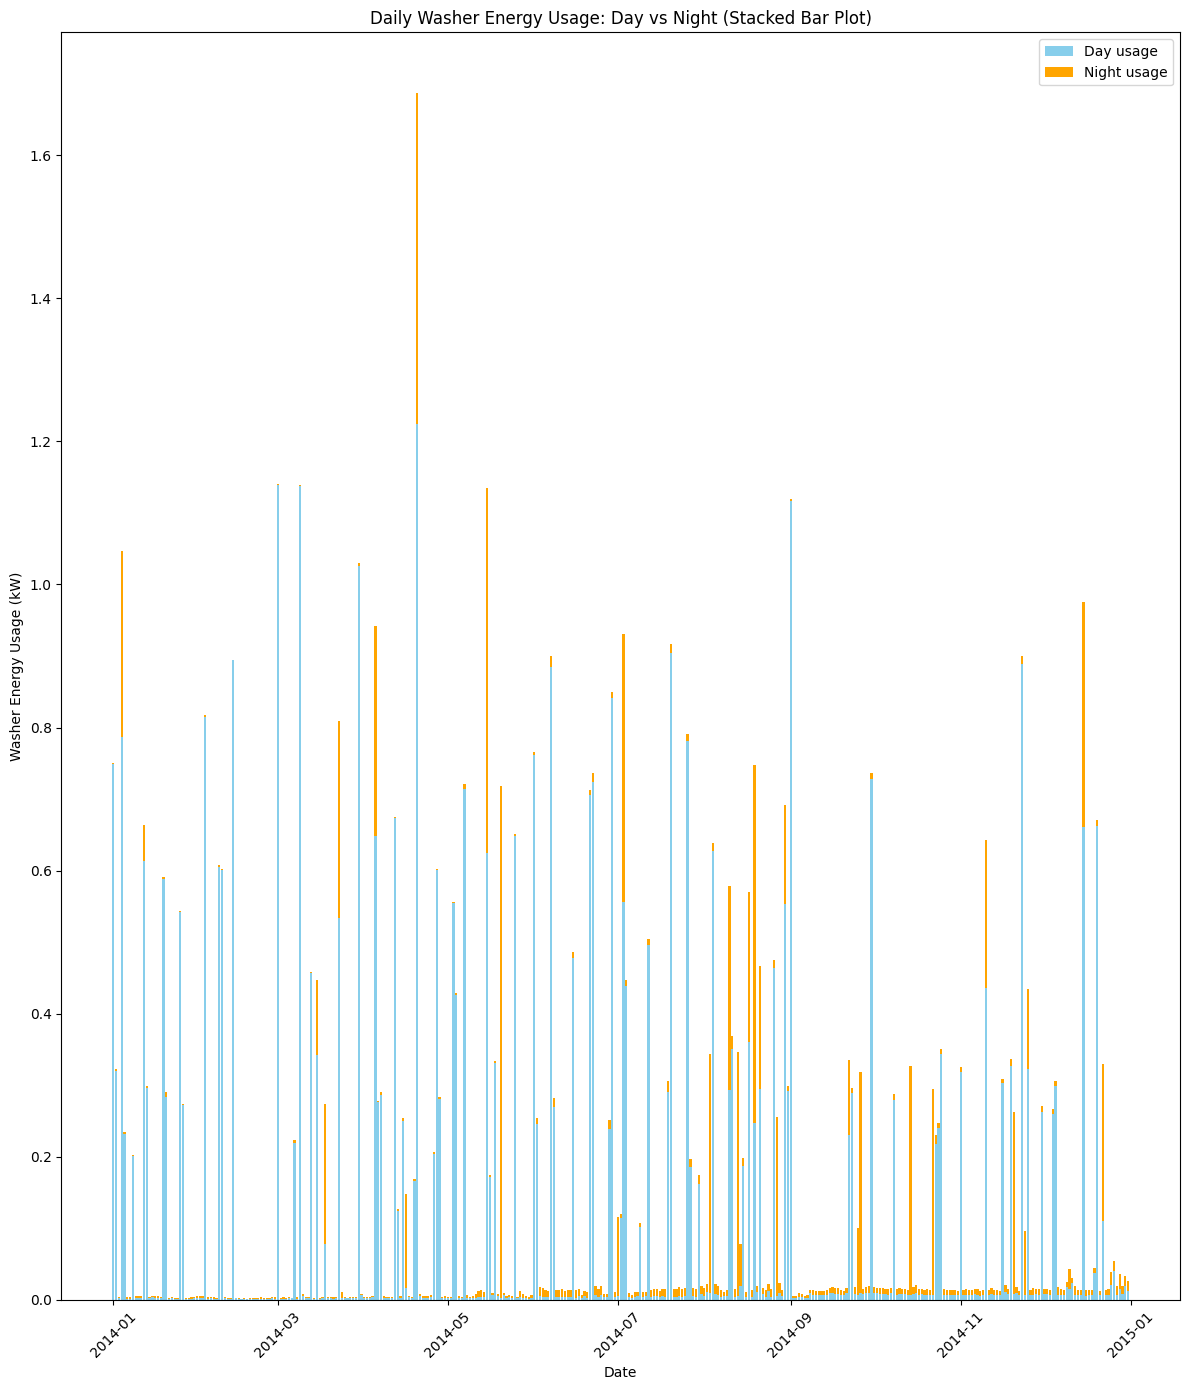

In [624]:
# Stacked bar plot (shows energy usage for each day)

# Pivot to get day and night as columns
pivot = task5_df.pivot(index='date', columns='type', values='Washer [kW]')

# Plot stacked bar plot
plt.figure(figsize=(12,14))
plt.bar(pivot.index, pivot['day'], label='Day usage', color='skyblue')
plt.bar(pivot.index, pivot['night'], bottom=pivot['day'], label='Night usage', color='orange')

plt.xlabel('Date')
plt.ylabel('Washer Energy Usage (kW)')
plt.title('Daily Washer Energy Usage: Day vs Night (Stacked Bar Plot)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [619]:
# Energy usage of each device, split by day and night

# Aggregate energy usage by day and night
aggregates = task5_df.groupby('type')[['AC [kW]', 'Washer [kW]']].sum().reset_index()
print(aggregates)

    type      AC [kW]  Washer [kW]
0    day   382.094052    43.634363
1  night  1177.164342    10.101531


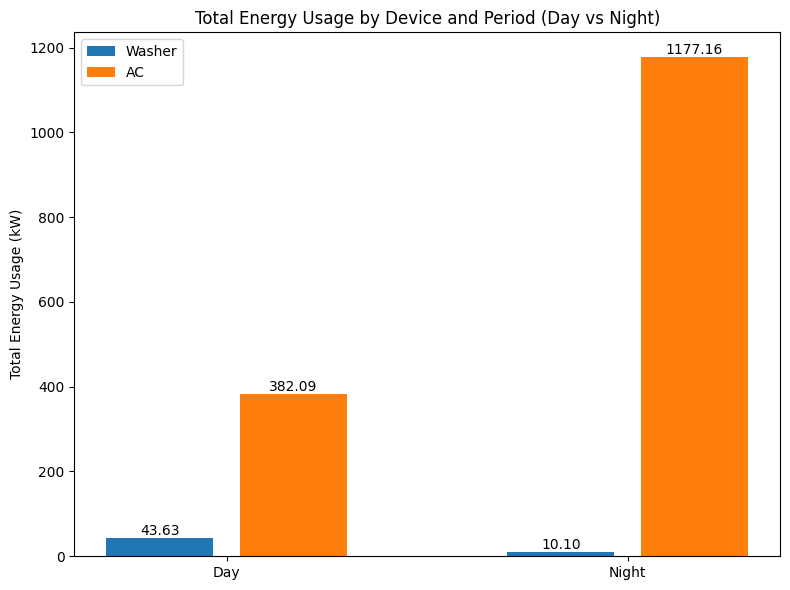

In [620]:
# plot side by side bar plots
labels = ['Washer Day', 'AC Day', 'Washer Night', 'AC Night']
values = [washer_day, ac_day, washer_night, ac_night]
x_pos = [0, 1, 3, 4]

plt.figure(figsize=(8, 6))

# Plot each bar with correct color and label only once per device
plt.bar(x_pos[0], values[0], width=0.8, color='#1f77b4', label='Washer')
plt.bar(x_pos[1], values[1], width=0.8, color='#ff7f0e', label='AC')
plt.bar(x_pos[2], values[2], width=0.8, color='#1f77b4')
plt.bar(x_pos[3], values[3], width=0.8, color='#ff7f0e')

# X-tick labels for groups
plt.xticks([0.5, 3.5], ['Day', 'Night'])
plt.ylabel('Total Energy Usage (kW)')
plt.title('Total Energy Usage by Device and Period (Day vs Night)')

# Add legend for devices (will only show once per color)
plt.legend()

# Add value labels
for i, v in enumerate(values):
    plt.text(x_pos[i], v + 0.05, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
